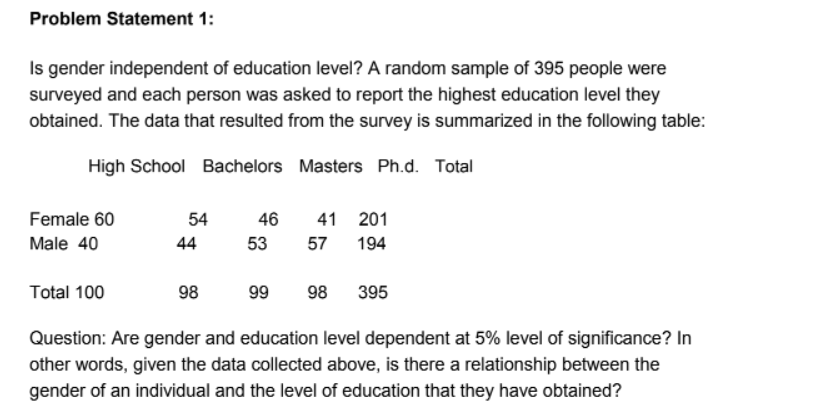

In [3]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats

male = [40,44,53,57]
female = [60,54,46,41] 
High_school=[60,40] 
Bachelors = [54,44] 
Masters = [46,53] 
Phd = [41,57]

marks = male+female 
sex=['M','M','M','M','F','F','F','F'] 
education =['High_school','Bachelors','Masters','Ph.d','High_school','Bachelors','Masters','Ph.d'] 
df = pd.DataFrame({"Education":education,"Marks":marks,"Sex":sex})


In [4]:
df

,Education,Marks,Sex
0,High_school,40,M
1,Bachelors,44,M
2,Masters,53,M
3,Ph.d,57,M
4,High_school,60,F
5,Bachelors,54,F
6,Masters,46,F
7,Ph.d,41,F


In [21]:
dataset_table = pd.crosstab([df['Sex'],df['Marks']],df['Education'],margins=True)

In [22]:
dataset_table

Education  Bachelors  High_school  Masters  Ph.d  All
Sex Marks                                            
F   41             0            0        0     1    1
    46             0            0        1     0    1
    54             1            0        0     0    1
    60             0            1        0     0    1
M   40             0            1        0     0    1
    44             1            0        0     0    1
    53             0            0        1     0    1
    57             0            0        0     1    1
All                2            2        2     2    8

In [23]:
observed_values = dataset_table.values

In [24]:
observed_values

array([[0, 0, 0, 1, 1],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [2, 2, 2, 2, 8]])

In [25]:
val = stats.chi2_contingency(dataset_table)

In [31]:
expected_value = val[3]

In [33]:
no_of_rows = len(dataset_table.iloc[:2,0])

In [34]:
no_of_columns = len(dataset_table.iloc[0,0:2])

In [37]:
degree_of_freedom = (no_of_rows -1)* (no_of_columns-1)

In [38]:
alpha = 0.05

In [39]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_value)])

In [40]:
chi_square_statistics = chi_square[0] + chi_square[1]

In [41]:
print('chi-squared statistics:-', chi_square_statistics)

chi-squared statistics:- 12.0


In [43]:
critical_value = chi2.ppf(q=1-alpha , df = degree_of_freedom)

In [44]:
print('critical_value:-', critical_value)

critical_value:- 3.841458820694124


In [51]:
if chi_square_statistics >= critical_value:
  print('Rejecting H0 , there is a relationship between the education and gender\n i.e the education is depand upon the gender')
else:
  print('accept H0 ,there is no relation beteen the education and gender, \n i.e the education is not depand upon the gender')


Rejecting H0 , there is a relationship between the education and gender
 i.e the education is depand upon the gender


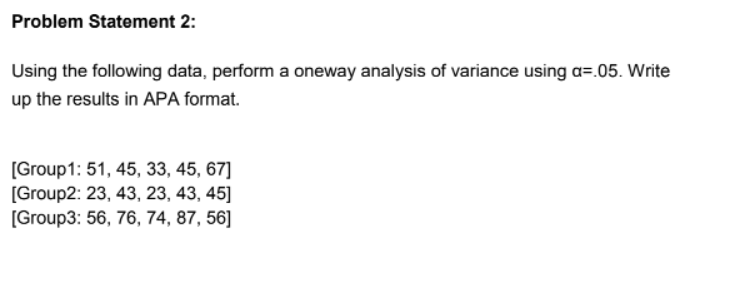

between the sample

In [52]:
Group1 = [51, 45, 33, 45, 67] 
Group2 = [23, 43, 23, 43, 45] 
Group3 = [56, 76, 74, 87, 56]

In [53]:
total = sum(Group1), sum(Group2), sum(Group3)

In [56]:
total

(241, 177, 349)

In [55]:
group_mean = total[0]/5, total[1]/5, total[2]/5

In [57]:
group_mean

(48.2, 35.4, 69.8)

In [58]:
mean_bar = sum(group_mean)/len(group_mean)

In [59]:
mean_bar

51.133333333333326

In [65]:
# variance between the sample SSC
group_1_mean_diff_square = [(group_mean[0] - mean_bar)**2 ]* len(Group1)
group_2_mean_diff_square = [(group_mean[1] - mean_bar)**2 ]* len(Group2)
group_3_mean_diff_square = [(group_mean[2] - mean_bar)**2 ]* len(Group3)

In [66]:
SSC = sum(group_1_mean_diff_square) +sum(group_2_mean_diff_square)+ sum(group_3_mean_diff_square)

In [68]:
print('variance between the sample is (SSS):- ',SSC)

variance between the sample is (SSS):-  3022.933333333333


In [72]:
SSC/2

1511.4666666666665

In [74]:
degree_of_freedom = 2 # no of columns - 1
MSC = SSC/degree_of_freedom
print('Mean square:- ',MSC)

Mean square:-  1511.4666666666665


Within the sample

In [75]:
SSE = sum([(i - group_mean[0])**2 for i in Group1]) + sum([(i - group_mean[1])**2 for i in Group2]) + sum([(i - group_mean[2])**2 for i in Group3])

In [76]:
print('variance between the sample is (SSE):- ',SSE)

variance between the sample is (SSE):-  1860.8


In [77]:
degree_freedom = 3*5 - 3 

In [78]:
MSE = SSE / degree_freedom

In [79]:
print('Mean square:- ',MSE)

Mean square:-  155.06666666666666


In [80]:
# calculating the F value 
F  = MSC / MSE

In [81]:
print('calculated f value:- ' , F) 

calculated f value:-  9.747205503009457


In [82]:
Tabulated_value_f = 3.89

tablulated value is less than the calculated value hence we reject the null hypothesis there is some variation between the group

using python

In [83]:
statistic, pvalue = stats.f_oneway(Group1,Group2,Group3) 
print("F Statistic value {} , p-value {}".format(statistic,pvalue)) 
if pvalue < 0.05: 
  print('True') 
else: 
  print('False')

print("The test result suggests the groups have different same sample means in this example, since the p-value is significant at a 99% confidence level. Here the p-value returned is 0.00305 which is < 0.05")

F Statistic value 9.747205503009463 , p-value 0.0030597541434430556
True
The test result suggests the groups have different same sample means in this example, since the p-value is significant at a 99% confidence level. Here the p-value returned is 0.00305 which is < 0.05


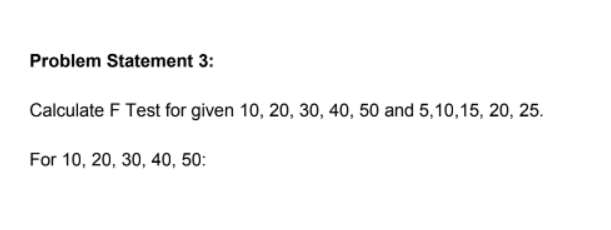

In [85]:
Group1 = [10, 20, 30, 40, 50] 
Group2 = [5,10,15, 20, 25] 
mean_1 = np.mean(Group1) 
mean_2 = np.mean(Group2) 
grp1_sub_mean1 = [] 
grp2_sub_mean2 = [] 
add1 = 0
add2 = 0 
for items in Group1: 
  add1 += (items - mean_1)**2 
for items in Group2: 
  add2 += (items - mean_2)**2 
var1 = add1/(len(Group1)-1) 
var2 = add2/(len(Group2)-1)

F_Test = var1/var2 
print("F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25 is : ",F_Test)

F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25 is :  4.0
